In [1]:
from gurobipy import *
import numpy as np

In [14]:
horizon = [i for i in range(0,10)]

In [5]:
model = Model('test')

Academic license - for non-commercial use only


In [15]:
r = model.addVars(horizon, ub=1.0, name="valve")

In [17]:
r

{0: <gurobi.Var *Awaiting Model Update*>,
 1: <gurobi.Var *Awaiting Model Update*>,
 2: <gurobi.Var *Awaiting Model Update*>,
 3: <gurobi.Var *Awaiting Model Update*>,
 4: <gurobi.Var *Awaiting Model Update*>,
 5: <gurobi.Var *Awaiting Model Update*>,
 6: <gurobi.Var *Awaiting Model Update*>,
 7: <gurobi.Var *Awaiting Model Update*>,
 8: <gurobi.Var *Awaiting Model Update*>,
 9: <gurobi.Var *Awaiting Model Update*>}

In [18]:
years = tuplelist(range(2+1))
skill_levels = [0, 1, 2]  # 0 = Unskilled, 1 = Semiskilled, 2 = Skilled
Unskilled = 0
Semiskilled = 1
Skilled = 2

CurrentStrength = [2000, 1500, 1000]
Requirement = [[1000, 1400, 1000],
               [500, 2000, 1500],
               [0, 2500, 2000]]
LeaveFirstYear = [0.25, 0.20, 0.10]
LeaveEachYear = [0.10, 0.05, 0.05]
ContinueFirstYear = [1 - a for a in LeaveFirstYear]
ContinueEachYear = [1 - a for a in LeaveEachYear]
LeaveDownGraded = 0.50
ContinueDownGraded = 1 - LeaveDownGraded
MaxRecruit = [500, 800, 500]
MaxRetrainUnskilled = 200
MaxOverManning = 150
MaxShortTimeWorking = 50
RetrainSemiSkilled = 0.25
ShortTimeUsage = 0.50

RetrainCost = [400, 500, 0]
RedundantCost = [200, 500, 500]
ShortTimeCost = [500, 400, 400]
OverManningCost = [1500, 2000, 3000]

In [20]:
MaxRecruit2 = {(level, year) : MaxRecruit[level] for level in skill_levels for year in years}
model = Model('Manpower planning')

Recruit = model.addVars(skill_levels, years, ub= MaxRecruit2, name="Recruit")
ShortTime = model.addVars(skill_levels, years, ub=MaxShortTimeWorking,
                          name="ShortTime")
LaborForce = model.addVars(skill_levels, years, name="LaborForce")
Redundant = model.addVars(skill_levels, years, name="Redundant")
OverManned = model.addVars(skill_levels, years, name="OverManned")
Retrain = model.addVars(skill_levels, skill_levels, years, name="Retrain")

In [37]:
x = np.linspace(0, 500, 1000)
y = np.sqrt(x)

In [38]:
import matplotlib.pyplot as plt

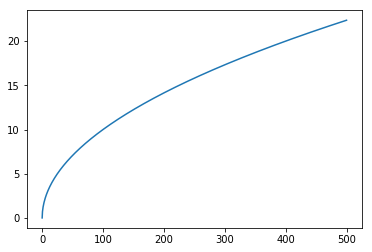

In [39]:
plt.plot(x,y)

In [40]:
p = np.polyfit(x,y,2)

In [41]:
y1 = x**2 *p[0] + x*p[1] +p[2]

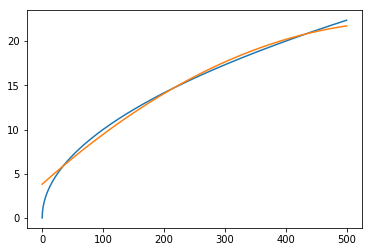

In [42]:
plt.plot(x,y)
plt.plot(x,y1)

In [43]:
p

array([-5.13182053e-05,  6.14647148e-02,  3.81572575e+00])